In [1]:
# get the elementary statistics (mean, min, max, etc) by opening data_train.csv using pandas
import pandas as pd

# Read the CSV file
df = pd.read_csv('data_train.csv')

# Get the elementary statistics
statistics = df.describe()

# Print the statistics
print(statistics)

       battery_power         blue  clock_speed     dual_sim          fc  \
count    1400.000000  1400.000000  1400.000000  1400.000000  1400.00000   
mean     1237.145714     0.493571     1.521714     0.502857     4.27500   
std       430.051785     0.500137     0.814723     0.500171     4.32417   
min       501.000000     0.000000     0.500000     0.000000     0.00000   
25%       864.750000     0.000000     0.700000     0.000000     1.00000   
50%      1219.000000     0.000000     1.500000     1.000000     3.00000   
75%      1602.000000     1.000000     2.200000     1.000000     7.00000   
max      1998.000000     1.000000     3.000000     1.000000    19.00000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000  ...   
mean      0.530000    31.962143     0.507857   139.375714     4.481429  ...   
std       0.499278    18.162970     0.288539    35.400803     2.279836  ...   
min     

In [2]:
# Get duplicate values
duplicate_values = df[df.duplicated()]
print(duplicate_values)

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]


In [3]:
# get missing values
missing_values = df.isnull().sum()
print(missing_values)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


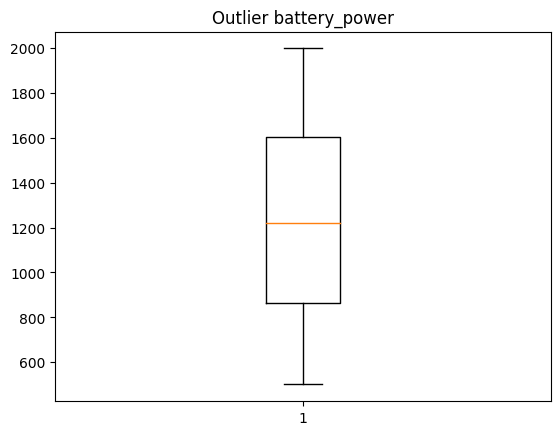

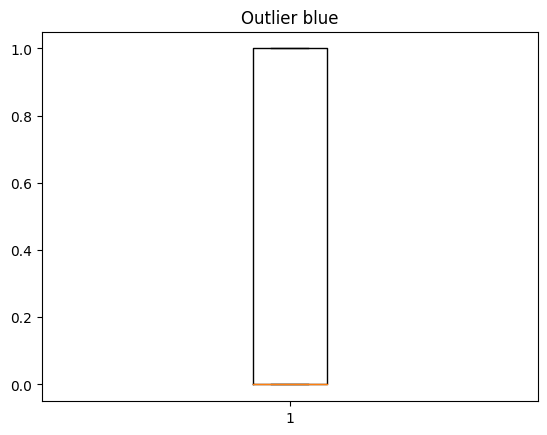

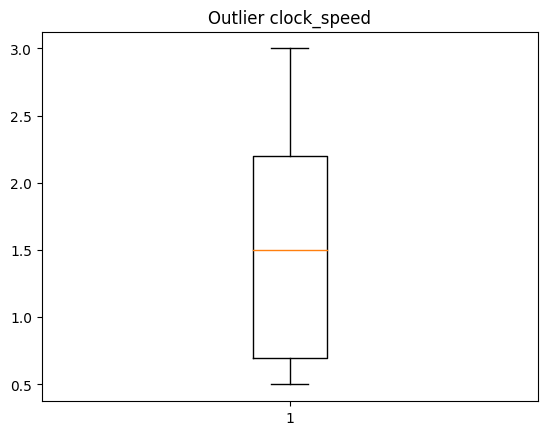

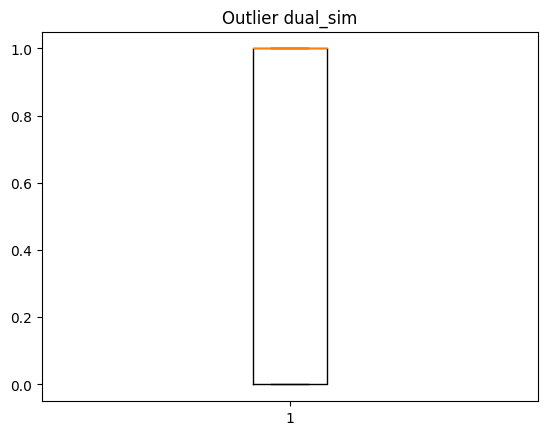

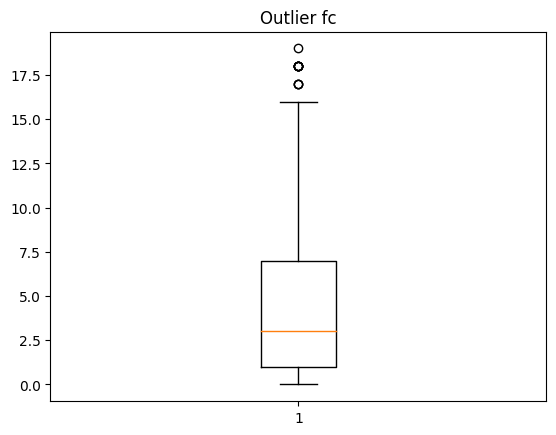

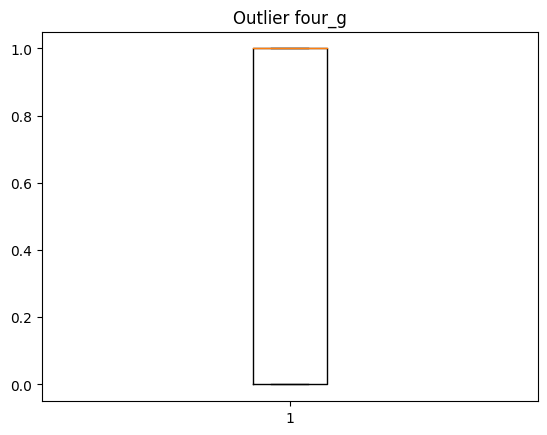

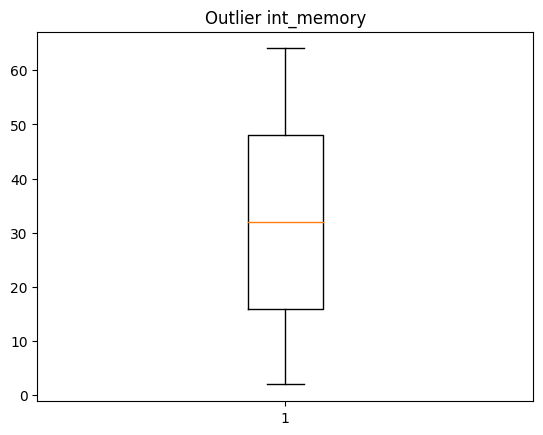

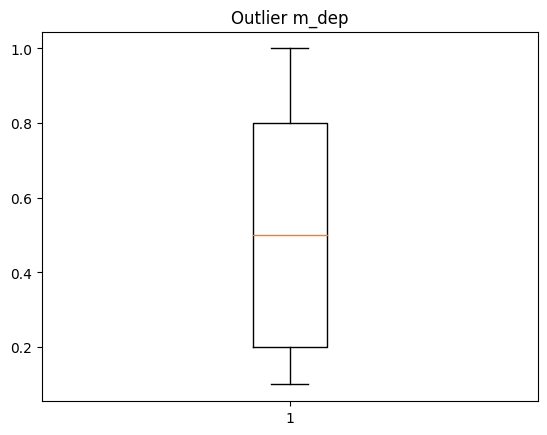

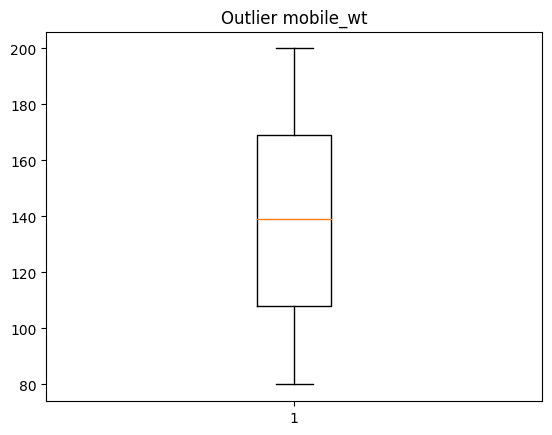

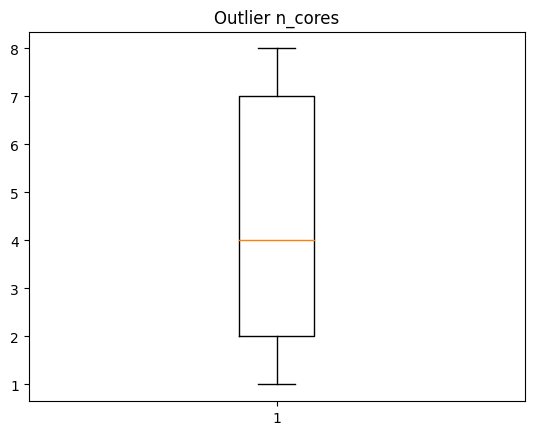

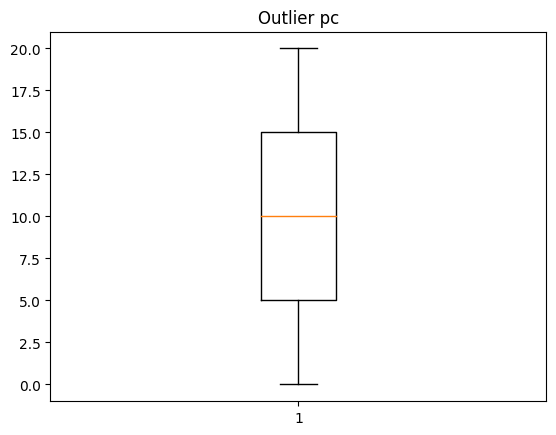

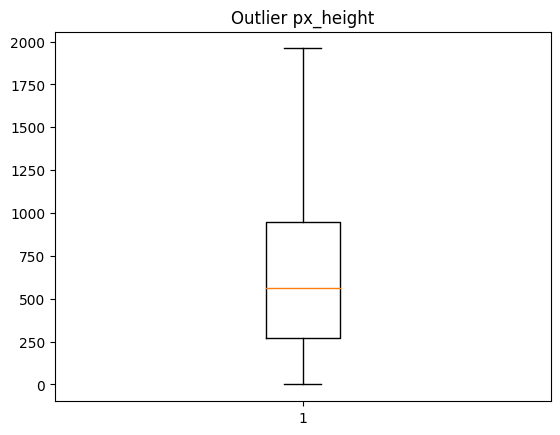

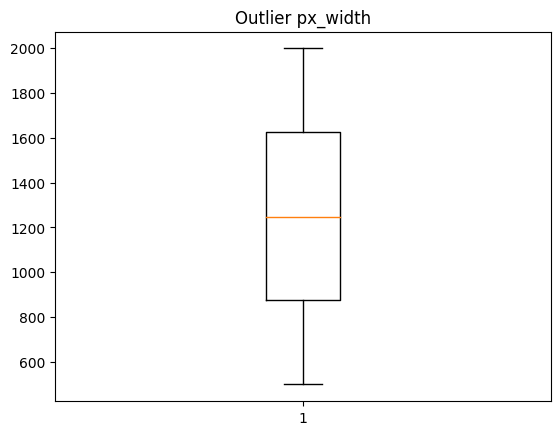

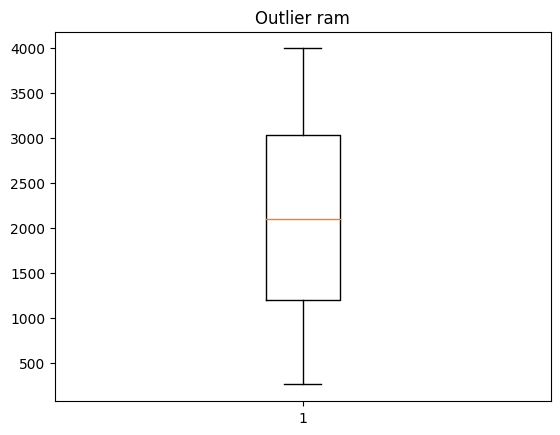

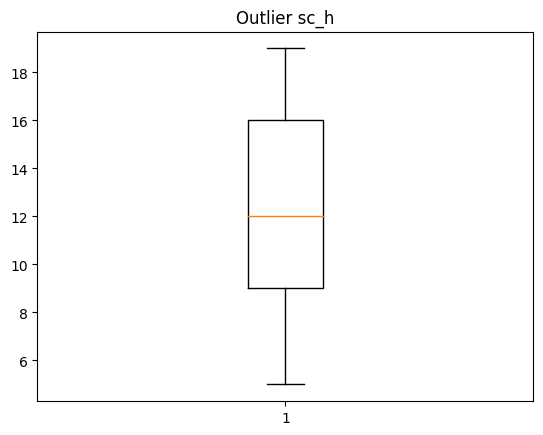

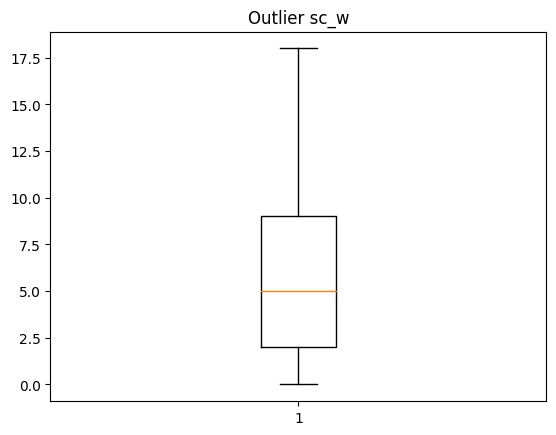

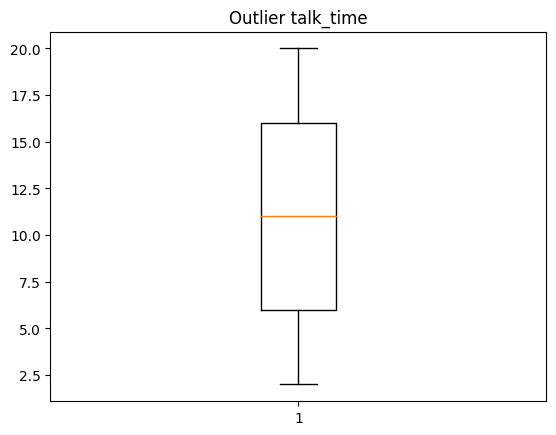

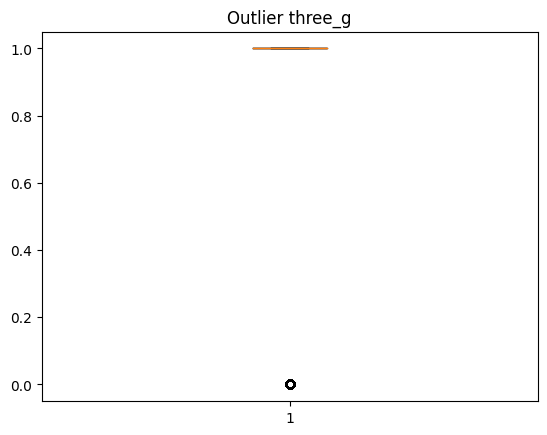

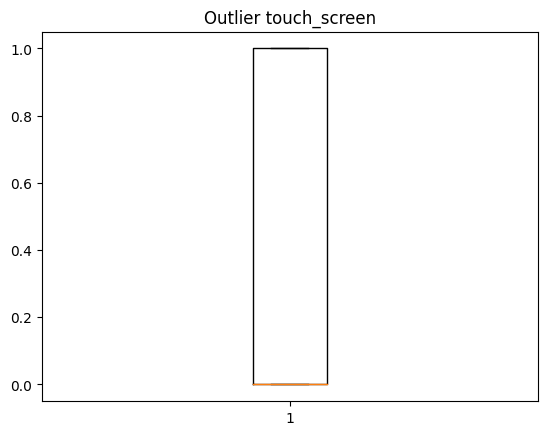

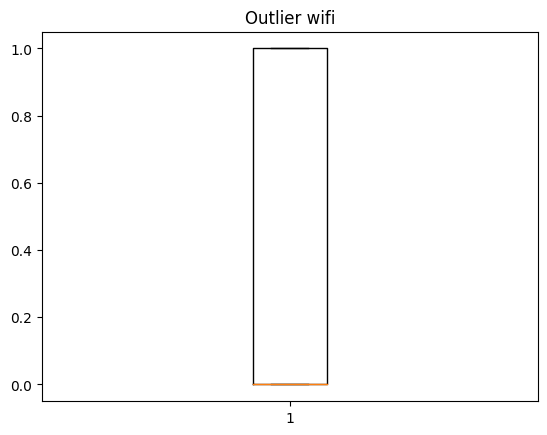

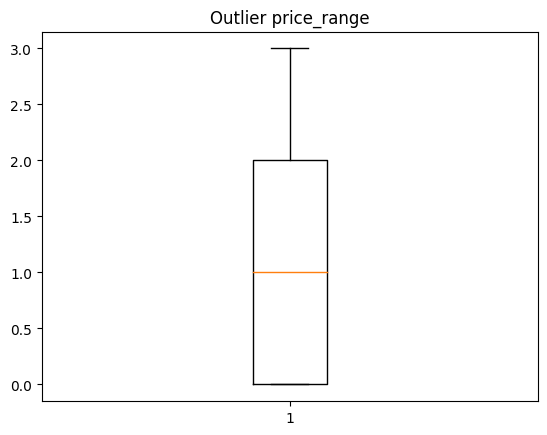

In [7]:
# show outliers by showing diagram using matplotlib for each column
import matplotlib.pyplot as plt

# Iterate over each column in the dataframe
for column in df.columns:
    # Create a boxplot for the current column
    plt.boxplot(df[column])
    plt.title(f"Outlier {column}")
    plt.show()

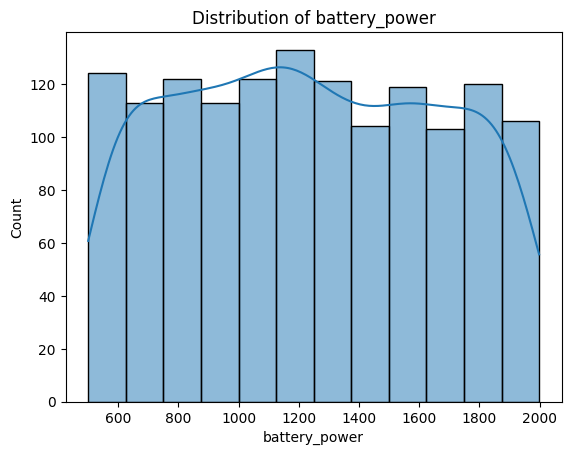

Kurtosis of battery_power: -1.1680683536883105


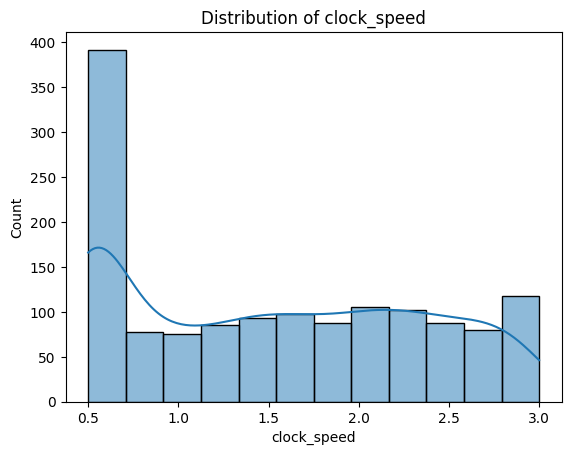

Kurtosis of clock_speed: -1.3295231896521231


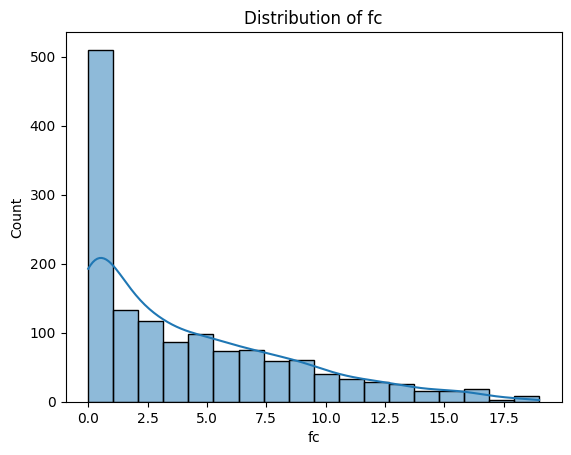

Kurtosis of fc: 0.29340439238319194


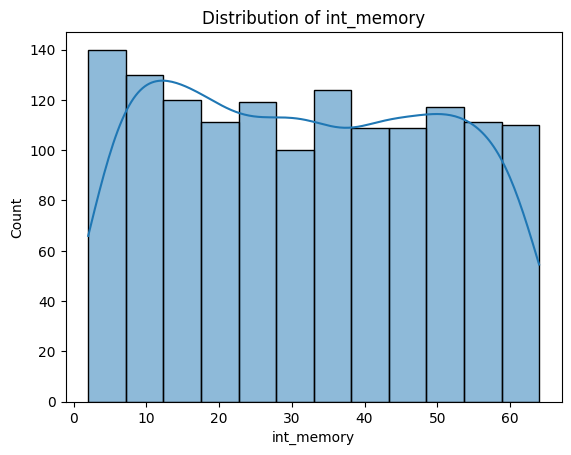

Kurtosis of int_memory: -1.22719971066165


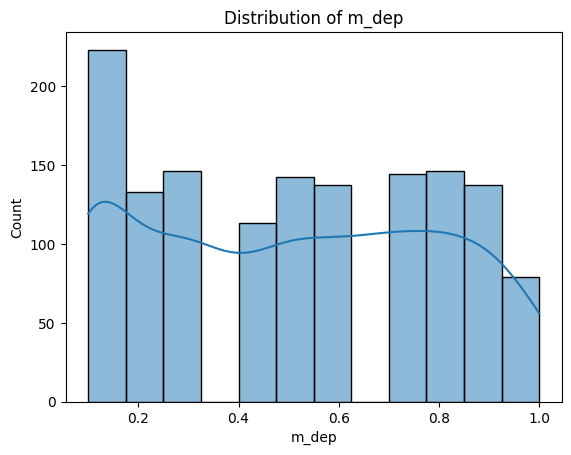

Kurtosis of m_dep: -1.2668226719440638


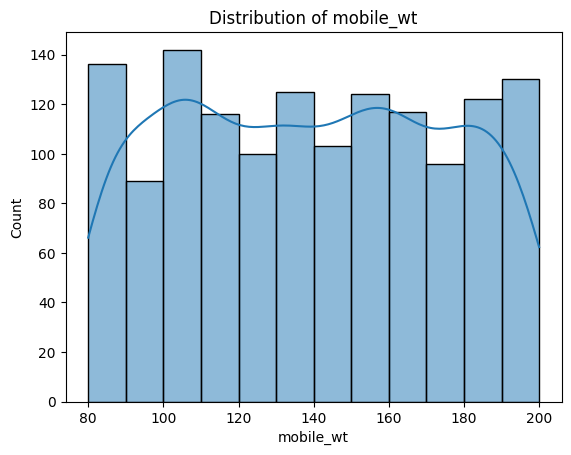

Kurtosis of mobile_wt: -1.210202007194779


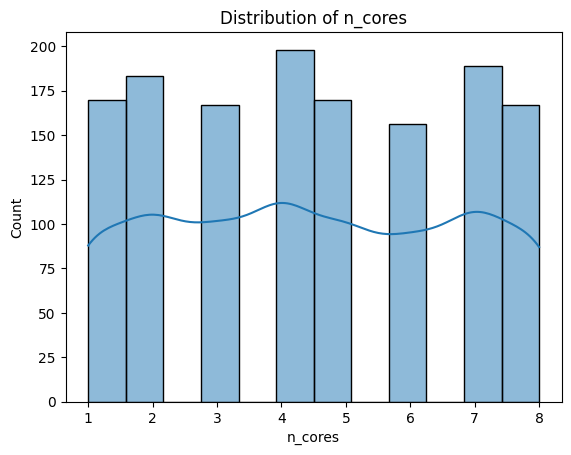

Kurtosis of n_cores: -1.2322085699401253


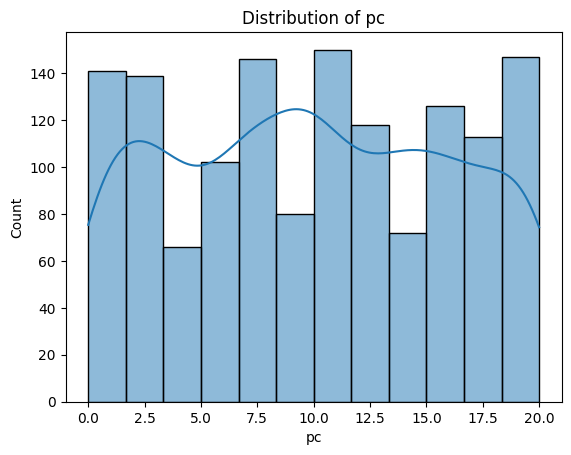

Kurtosis of pc: -1.1638760893853588


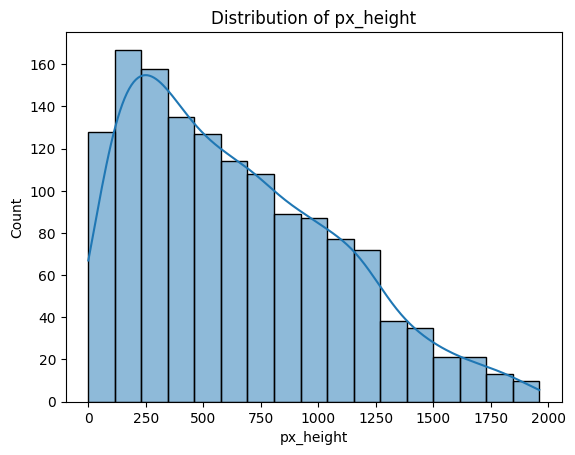

Kurtosis of px_height: -0.3162286486894521


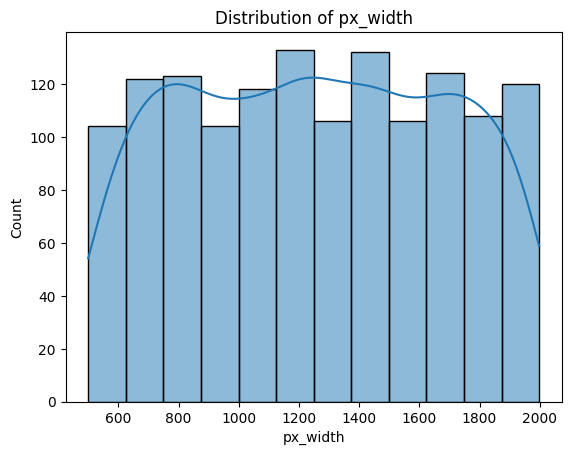

Kurtosis of px_width: -1.1760245181224622


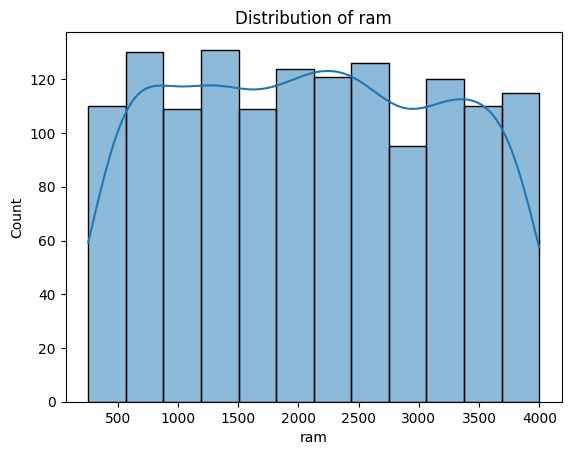

Kurtosis of ram: -1.1861412453532745


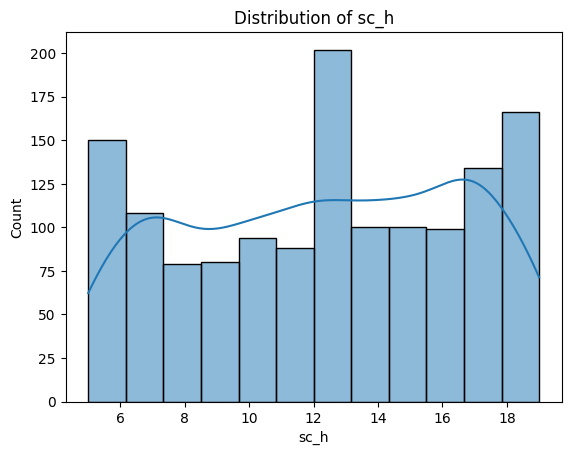

Kurtosis of sc_h: -1.183273418204271


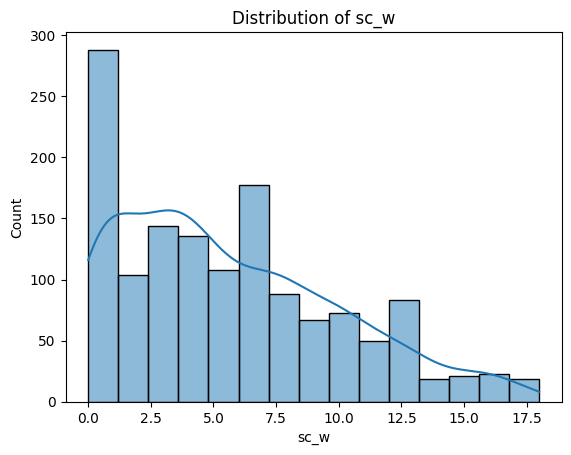

Kurtosis of sc_w: -0.3346408708969695


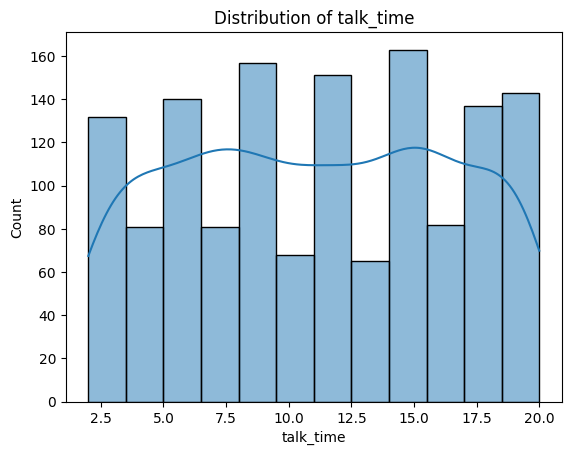

Kurtosis of talk_time: -1.1920181405410146


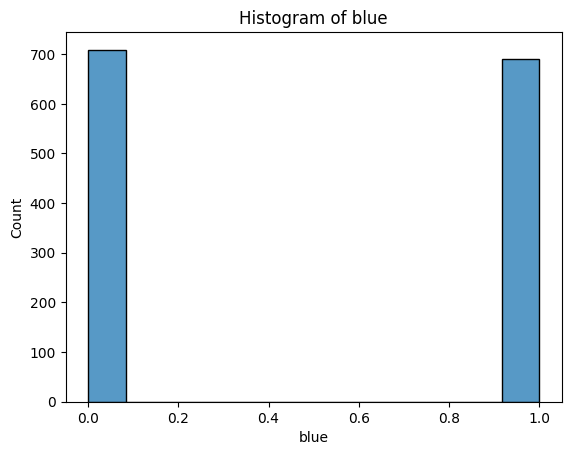

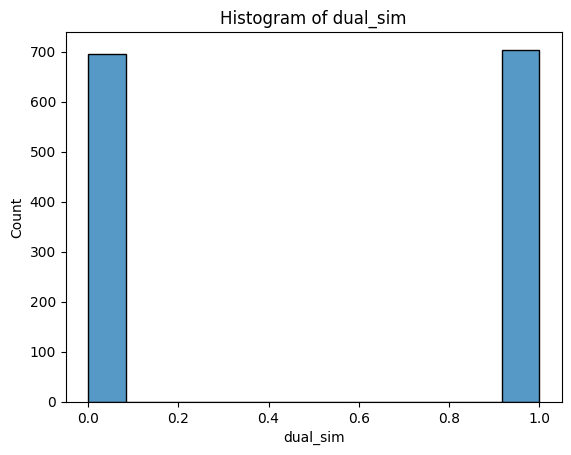

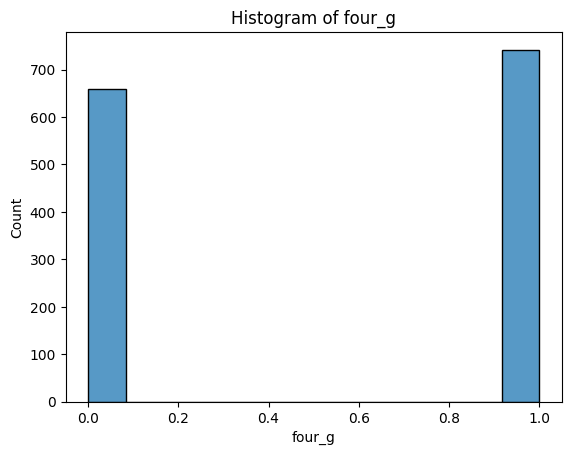

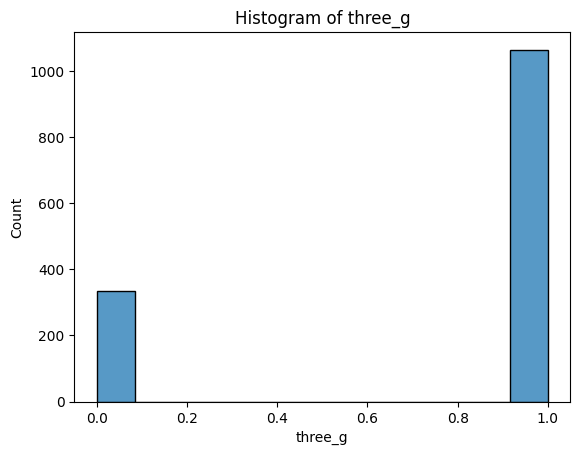

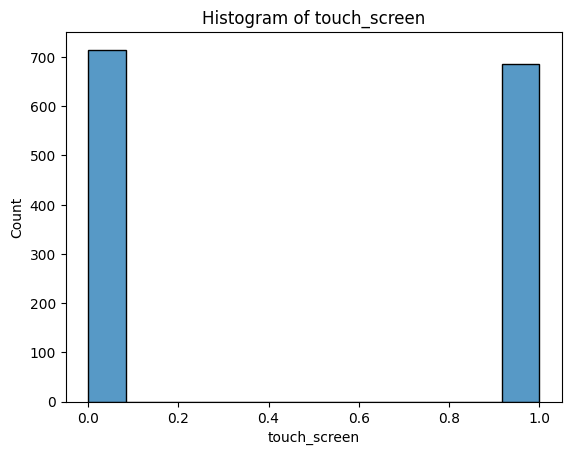

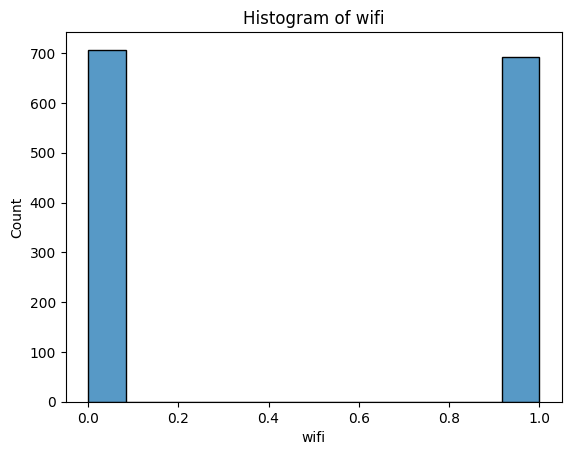

In [10]:
# Deskripsi Kolom
# battery_power: Total energi baterai dalam satu waktu diukur dalam mAh
# blue: Memiliki bluetooth atau tidak
# clock_speed: Kecepatan mikroprosesor menjalankan instruksi
# dual_sim: Memiliki dukungan dual sim atau tidak
# fc: Resolusi kamera depan dalam megapiksel
# four_g: Memiliki 4G atau tidak
# int_memory: Memori internal dalam gigabyte
# m_dep: Ketebalan ponsel dalam cm
# mobile_wt: Berat ponsel
# n_cores: Jumlah core prosesor
# pc: Resolusi kamera utama dalam megapiksel
# px_height: Tinggi resolusi piksel
# px_width: Lebar resolusi piksel
# ram: Ukuran RAM dalam megabyte
# sc_h: Tinggi layar ponsel dalam cm
# sc_w: Lebar layar ponsel dalam cm
# talk_time: Waktu telepon maksimum dalam satu kali pengisian baterai
# three_g: Memiliki 3G atau tidak
# touch_screen: Memiliki layar sentuh atau tidak
# wifi: Memiliki wifi atau tidak
# price_range (target): Rentang harga dengan nilai 0 (biaya rendah), 1 (biaya sedang), 2 (biaya tinggi) atau 3 (biaya sangat tinggi).

# Dengan deskripsi di atas, buat:
# Untuk kolom numerik: distribusi data (plot dan analisis kurtosis)
# Untuk kolom non numerik: histogram

numerics = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
non_numerics = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# Untuk kolom numerik: distribusi data (plot dan analisis kurtosis)
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each numeric column in the dataframe
for column in numerics:
    # Plot the distribution of the current column
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

    # Calculate the kurtosis of the current column
    kurtosis = df[column].kurtosis()
    print(f"Kurtosis of {column}: {kurtosis}")

# Untuk kolom non numerik: histogram
# Iterate over each non-numeric column in the dataframe
for column in non_numerics:
    # Plot the histogram of the current column
    sns.histplot(data=df, x=column)
    plt.title(f"Histogram of {column}")
    plt.show()

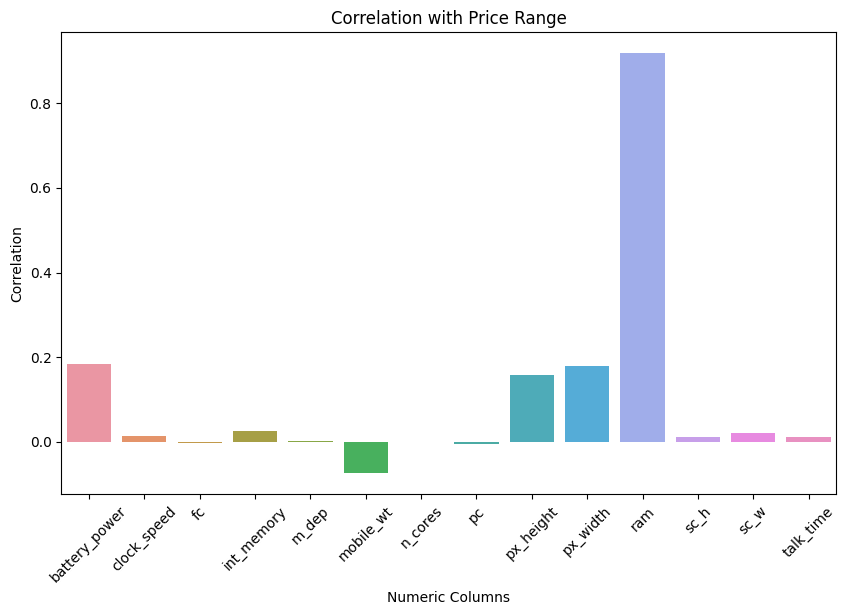

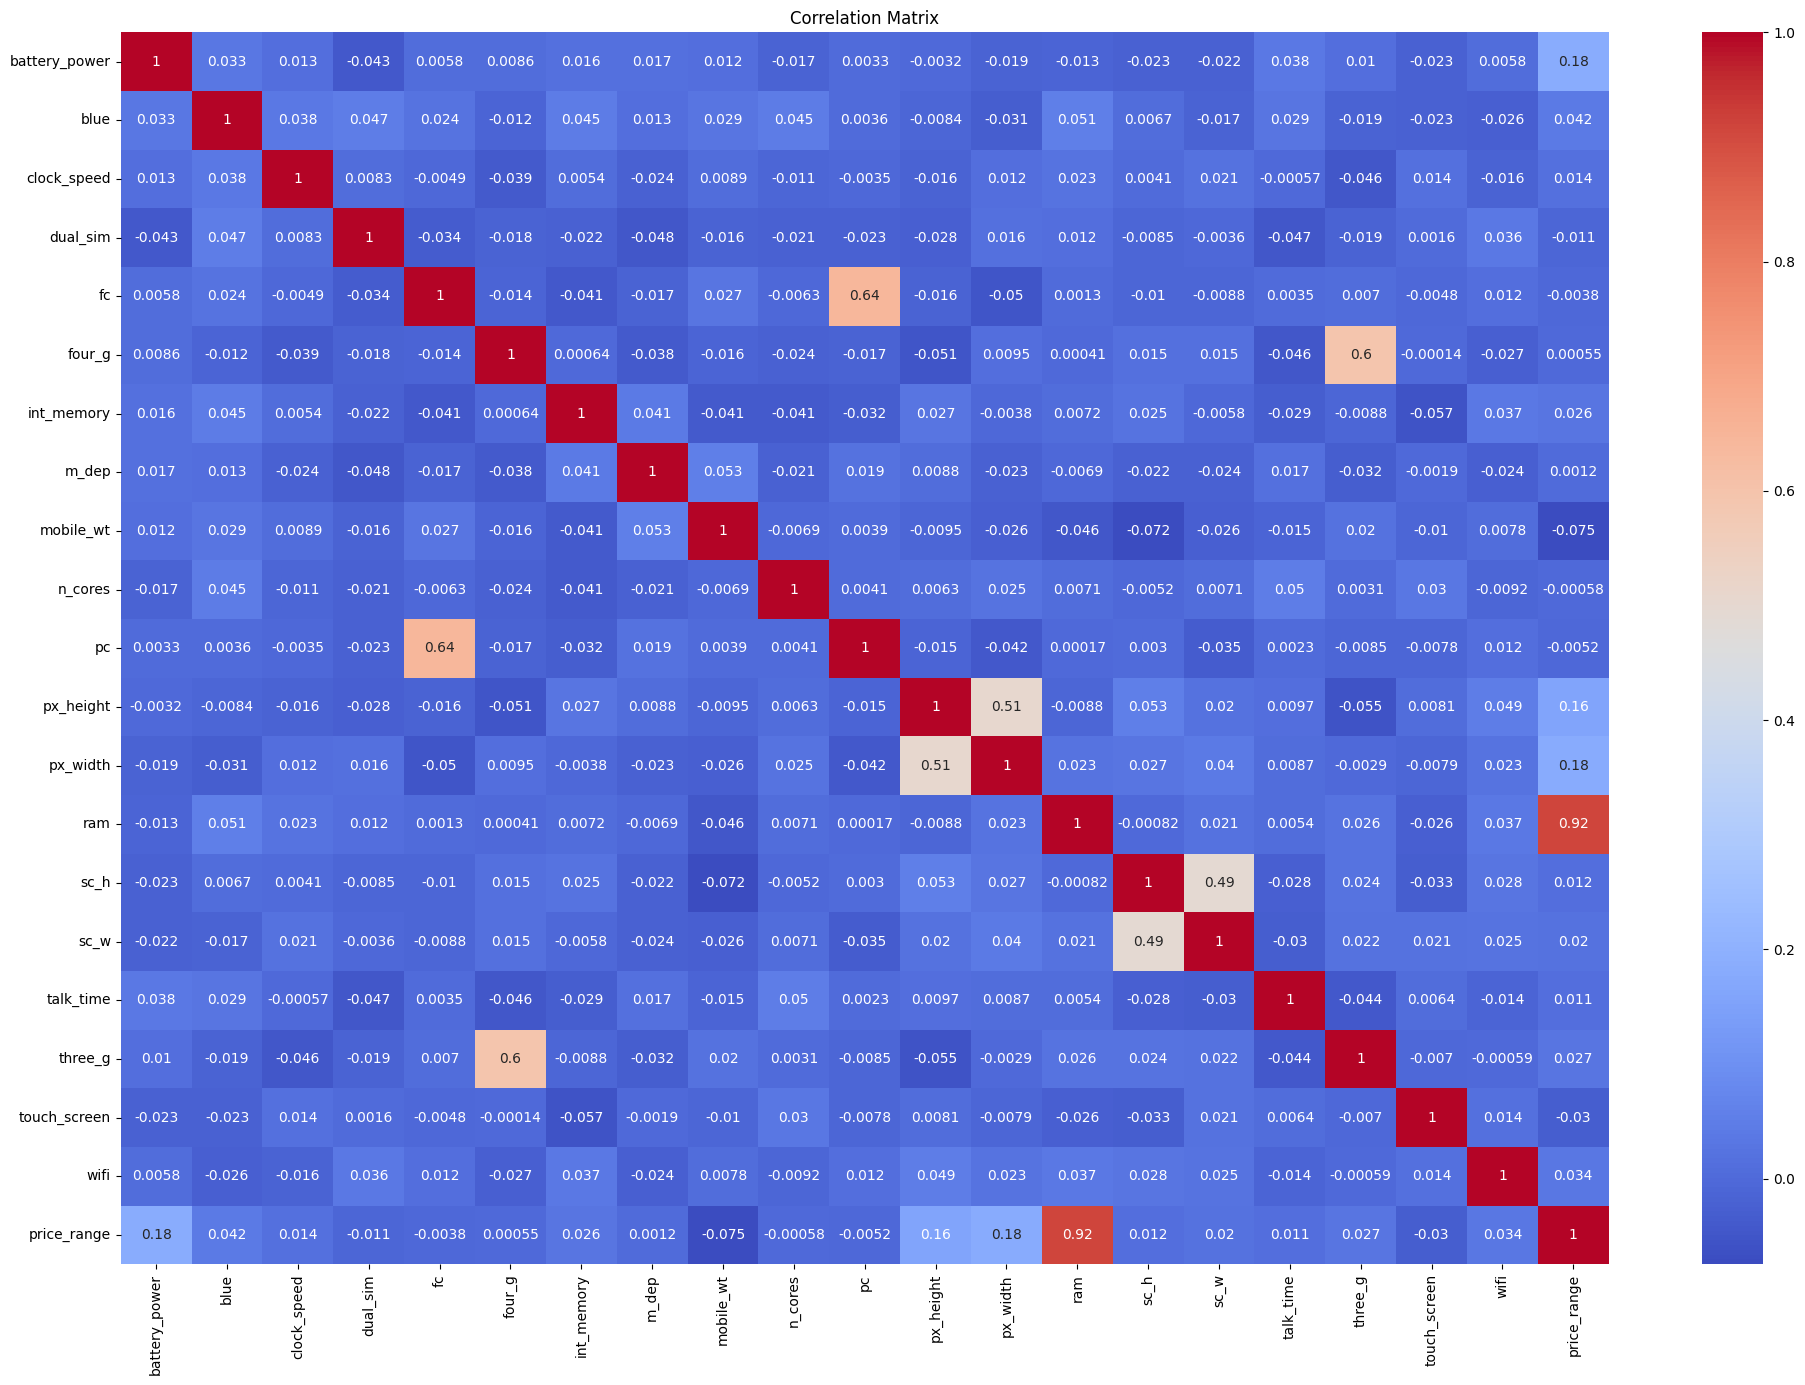

In [16]:
# buat diagram korelasi dengan target adalah kolom price_range untuk setiap kolom

# Calculate the correlation between each numeric column and the target column (price_range)
correlation = df[numerics].corrwith(df['price_range'])

# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title("Correlation with Price Range")
plt.xlabel("Numeric Columns")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.show()

#buat korelasi matrix
# Create correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()